In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
Xsize = 64
Ysize = 48
Image = np.ones ((Ysize, Xsize), dtype = float)

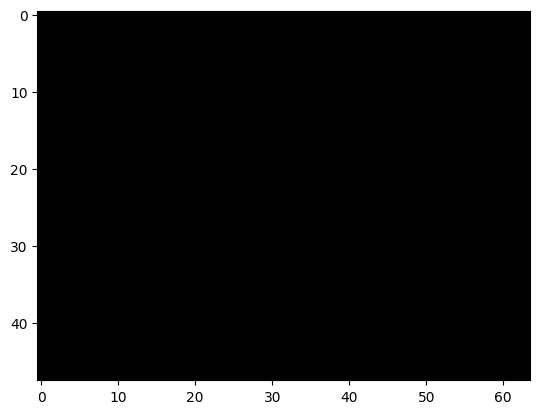

In [3]:
def Show (img):
    pl.imshow (img, cmap = 'gray')

Show (Image)

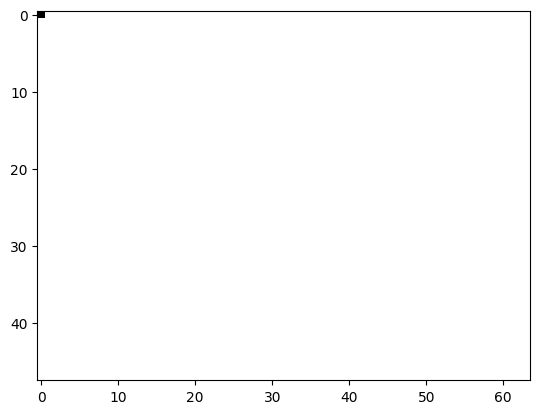

In [4]:
Image [0, 0] = 0.0
Show (Image)

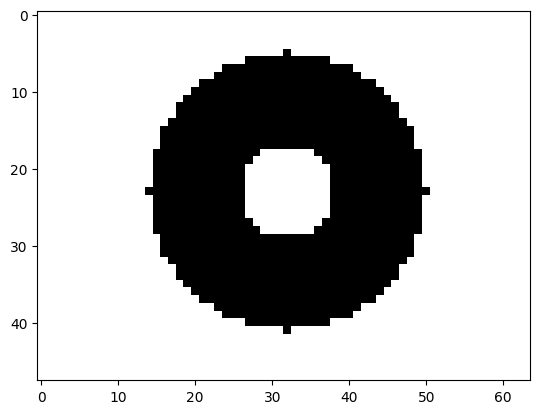

In [5]:
def Set (x, y, c):
    Image [Ysize - 1 - y] [x] = c

x0 = Xsize // 2
y0 = Ysize // 2
r = min (Xsize, Ysize)
r1 = r / 8
r2 = 3 * r1

Image = np.ones ((Ysize, Xsize), dtype = float)
for x in range (Xsize):
    for y in range (Ysize):
        rr = (x - x0) ** 2 + (y - y0) ** 2 
        if  (rr >= r1 ** 2) and (rr <= r2 ** 2):
            Set (x, y, 0.0)

Show (Image)

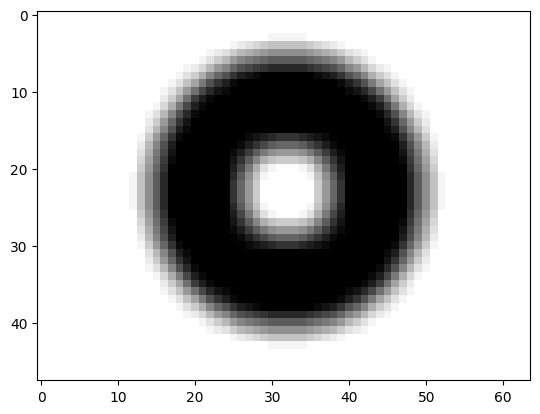

In [7]:
def BlurBox (img, r):
    res = np.ones_like (img)
    m, n = res.shape    
    for i in range (r, m - 1 - r):
        for k in range (r, n - 1 - r):
            res [i, k] = np.mean (img [i - r : i + r + 1, k - r : k + r + 1])
    return res

Show (BlurBox (Image, 2))

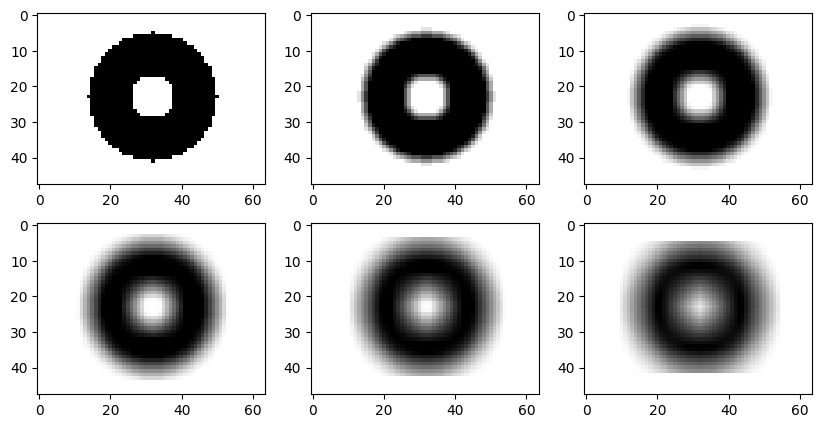

In [8]:
pl.figure (figsize = (10, 5))
pl.subplot (2, 3, 1); Show (BlurBox (Image, 0))
pl.subplot (2, 3, 2); Show (BlurBox (Image, 1))
pl.subplot (2, 3, 3); Show (BlurBox (Image, 2))
pl.subplot (2, 3, 4); Show (BlurBox (Image, 3))
pl.subplot (2, 3, 5); Show (BlurBox (Image, 4))
pl.subplot (2, 3, 6); Show (BlurBox (Image, 5))

In [9]:
def Gauss1D (sigma, x):
    return 1 / (sigma * np.sqrt (2 * np.pi)) * np.exp (- (x ** 2 / (2 * sigma ** 2)))

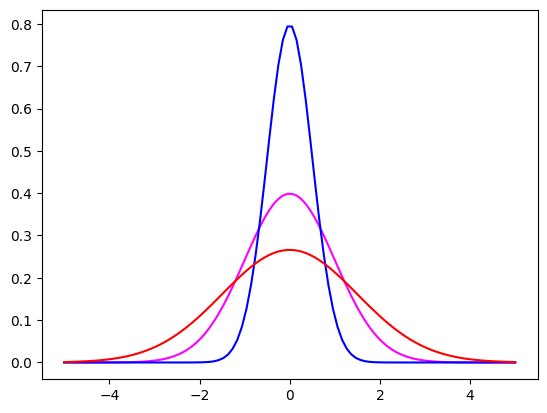

In [10]:
x = np.linspace (-5, 5, 100)
pl.plot (x, Gauss1D (1, x), 'magenta')
pl.plot (x, Gauss1D (0.5, x), 'blue')
pl.plot (x, Gauss1D (1.5, x), 'red')

In [11]:
def Gauss2D (sigma, x, y):
    return 1 / (2 * np.pi * sigma ** 2) * np.exp (- (x ** 2 + y ** 2) / (2 * sigma ** 2))

In [12]:
x = np.linspace (-3, 3, 101)
xx, yy = np.meshgrid (x, x)
zz = Gauss2D (1, xx, yy)

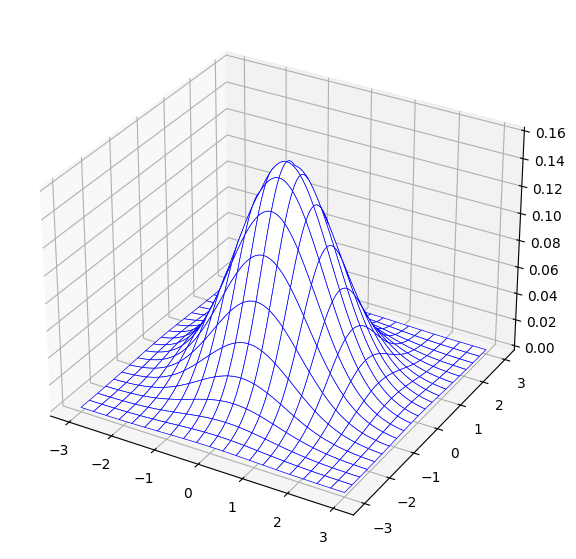

In [13]:
fig = pl.figure (figsize = (7, 7))
ax = fig.add_subplot (projection = '3d')
ax.plot_surface (xx, yy, zz, cstride = 5, rstride = 5,
    color = 'white', shade = False, edgecolor = 'blue', linewidth = 0.5)

[[0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.03965895 0.04685151 0.04952803 0.04685151 0.03965895]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]]


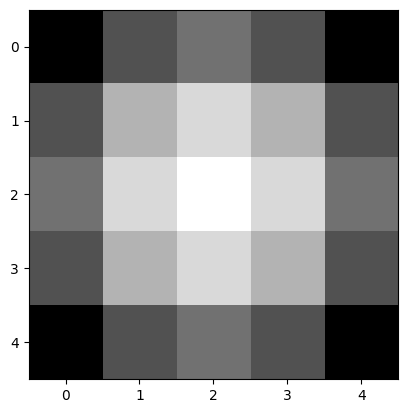

In [14]:
def GaussKernel (sigma, radius):
    x = np.arange (- radius, radius + 1)
    xx, yy = np.meshgrid (x, x)
    zz = Gauss2D (sigma, xx, yy)
    return zz / np.sum (zz)

Kernel = GaussKernel (3, 2)
print (Kernel)
Show (Kernel)

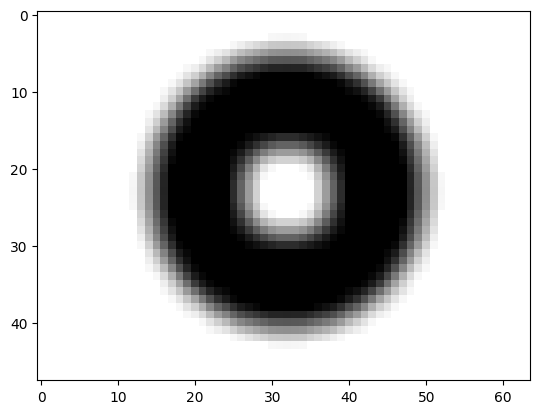

In [15]:
def Apply (kernel, image):
    irows, icols = image.shape
    krows, kcols = kernel.shape
    res = np.ones ((irows, icols))
    drow = krows // 2
    dcol = kcols // 2
    for row in range (0, irows - krows):
        for col in range (0, icols - kcols):
            res [row + drow, col + dcol] = np.sum (image [row : row + krows, col : col + kcols] * kernel)
    return res

Show (Apply (GaussKernel (3, 2), Image))

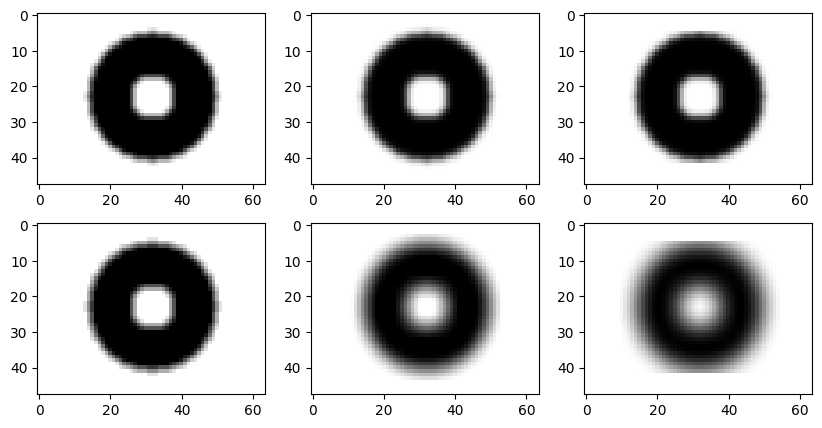

In [16]:
sigma = 1
pl.figure (figsize = (10, 5))
pl.subplot (2, 3, 1); Show (Apply (GaussKernel (1, 1), Image))
pl.subplot (2, 3, 2); Show (Apply (GaussKernel (1, 3), Image))
pl.subplot (2, 3, 3); Show (Apply (GaussKernel (1, 5), Image))
pl.subplot (2, 3, 4); Show (Apply (GaussKernel (3, 1), Image))
pl.subplot (2, 3, 5); Show (Apply (GaussKernel (3, 3), Image))
pl.subplot (2, 3, 6); Show (Apply (GaussKernel (3, 5), Image))